In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('UFO.csv')

In [4]:
newdata = pd.read_csv('NewUFO.csv')

In [5]:
data.head(1)

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,23:00,12/19/21,Branford,CT,Circle,NaN,See craft every evening when I get out of work...,12/19/21


In [6]:
newdata.head(1)

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,23:47,5/11/11,Bighorn (Municipal district) (Canada),AB,Circle,5 min,Bright oval shaped light.,5/12/11


In [7]:
data = data.append(newdata, ignore_index=True)

In [8]:

data.set_axis(["NA",'Time', 'Date', 'City', 'State', 'Shape', 'Duration', 'Summary', 'Posted'], axis=1, inplace=True)


In [9]:
data.drop(['NA','Posted'],axis=1, inplace=True)

In [10]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [11]:
data['Time'] = pd.to_datetime(data['Time'],errors='coerce').dt.hour

In [12]:
data.dropna(inplace=True)

In [13]:
data = data[data['Date'].dt.year<=2021]

In [14]:
data['Date'].sort_values(ascending=False).dt.year

1         2021
2         2021
3         2021
4         2021
5         2021
          ... 
73545     1972
91527     1970
101261    1966
99874     1962
103618    1950
Name: Date, Length: 86091, dtype: int64

In [15]:
shape_vc = data.Shape.value_counts().index

In [16]:
shape_vc

Index(['Light', 'Circle', 'Triangle', 'Other', 'Unknown', 'Sphere', 'Fireball',
       'Disk', 'Oval', 'Formation', 'Changing', 'Cigar', 'Flash', 'Rectangle',
       'Cylinder', 'Diamond', 'Chevron', 'Teardrop', 'Egg', 'Cone', 'Cross',
       'light', 'other', 'triangle', 'circle', 'Delta', 'sphere', 'cylinder',
       'rectangle', 'cigar', 'diamond', 'Round', 'oval', 'Crescent', 'CA',
       'fireball', 'egg', 'Summer', 'Early', 'Flare', 'TRIANGULAR', 'flash',
       'OH', 'changing', 'changed', 'unknown', 'pyramid', 'Hexagon', 'delta',
       'Jacksonville'],
      dtype='object')

In [17]:
for elements in shape_vc:
    if elements[0].isupper() == True:
        lowered = elements.lower()
        data['Shape'] = data.Shape.apply(lambda x : elements if x.lower() == lowered else x)
data['Shape'] = data.Shape.apply(lambda x : 'Triangle' if x == 'TRIANGULAR' else x)
data['Shape'] = data.Shape.apply(lambda x : 'Changing' if x == 'changed' else x)

In [18]:
shape_vc = data.Shape.value_counts().index

In [19]:
shape_vc

Index(['Light', 'Circle', 'Triangle', 'Other', 'Unknown', 'Sphere', 'Fireball',
       'Disk', 'Oval', 'Formation', 'Changing', 'Cigar', 'Flash', 'Rectangle',
       'Cylinder', 'Diamond', 'Chevron', 'Teardrop', 'Egg', 'Cone', 'Cross',
       'Delta', 'CA', 'Crescent', 'Round', 'Early', 'OH', 'Summer', 'Flare',
       'pyramid', 'Hexagon', 'Jacksonville'],
      dtype='object')

# 

# Data Analysis

# 

# The year with the most amount of sightings was 2015

In [20]:
data['Date'].dt.year.value_counts().head()

2015    6357
2020    5977
2016    5251
2011    4678
2008    4541
Name: Date, dtype: int64

# The year with the least amount of sightings was 2018 (21st Century)

In [21]:
data['Date'].dt.year.value_counts().tail()

2018    91
1950     1
1962     1
1966     1
1970     1
Name: Date, dtype: int64

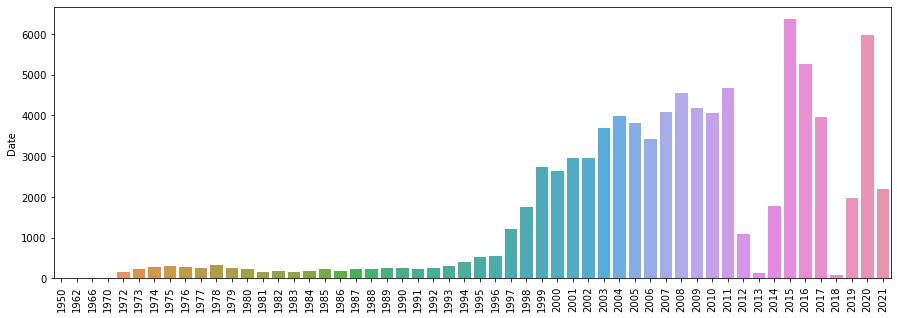

In [22]:
bar = data['Date'].dt.year.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=bar.index, y=bar)
plt.xticks(rotation=90)
plt.show()

# Most Occurred Sighting By City

In [23]:
data['City'].isnull().value_counts()

False    86091
Name: City, dtype: int64

### This most occurred sighting by city was Pheonix with 566 sightings, about 0.65 % of the whole dataset

In [24]:
data['City'].value_counts()

Phoenix                          566
Seattle                          480
Las Vegas                        435
Portland                         412
Los Angeles                      394
                                ... 
Bethel (Albany Township)           1
Pleasenton                         1
Cayuga                             1
East of Kingman (E of; rural)      1
Woodland (6 miles from town)       1
Name: City, Length: 18387, dtype: int64

In [25]:
print((566/86215*100), '%')

0.6564982891608189 %


# Top 10

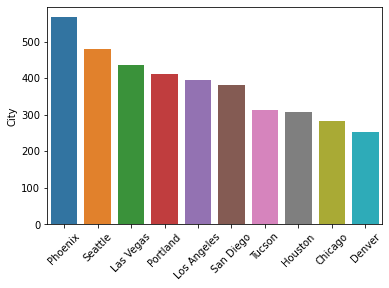

In [26]:
bar = data['City'].value_counts().head(10)
sns.barplot(x=bar.index, y=bar)
plt.xticks(rotation=45)
plt.show()

# Most Occurred Sighting By State

### This is about 12.35 percent of the dataset with NOT-NULL values

In [27]:
data['State'].isnull().value_counts()

False    86091
Name: State, dtype: int64

### The most occurred sighting by state was California with 10938 sightings, about 12.68 % of the whole dataset¶

In [28]:
data['State'].value_counts()

CA                  10918
FL                   4974
WA                   4533
TX                   4124
NY                   3736
                    ...  
March                   1
Ca                      1
Ontario                 1
VI                      1
County Waterford        1
Name: State, Length: 82, dtype: int64

In [29]:
print((10939/86215 * 100), '%')

12.688047323551585 %


# Top 10

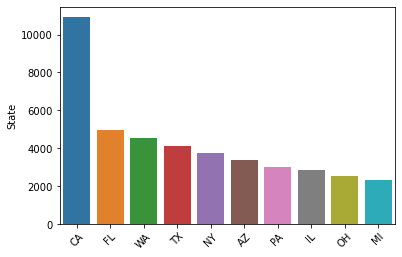

In [30]:
bar = data['State'].value_counts().head(10)
sns.barplot(x=bar.index, y=bar)
plt.xticks(rotation=45)
plt.show()

# Sightings by shape/appearence

### The most common thing seen from UFO encounters was simply light, with 18916 reportings

In [31]:
data['Shape'].isnull().value_counts()

False    86091
Name: Shape, dtype: int64

In [32]:
data['Shape'].value_counts().head()

Light       18961
Circle       8776
Triangle     8605
Other        6387
Unknown      6259
Name: Shape, dtype: int64

In [33]:
print((18920/86238 * 100), '%')

21.939284306222316 %


# Top 10

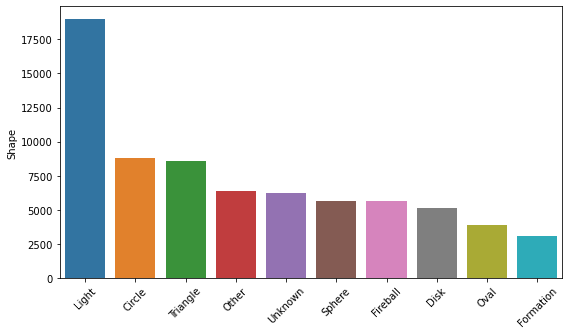

In [34]:
bar = data['Shape'].value_counts().head(10)
plt.figure(figsize=(9,5))
sns.barplot(x=bar.index, y=bar)
plt.xticks(rotation=45)
plt.show()

# Sightings were widley reported during military times 19-23 or 7:00PM to 11:00PM

# Sightings were less common duriong daytime, not surprising

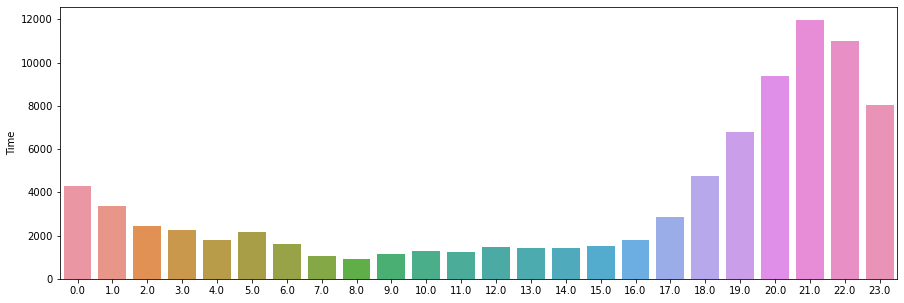

In [35]:
bar = data['Time'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=bar.index, y=bar)
plt.show()

# Sightings were extremely common on the days of the 1st and the 15th, regardless of the month

# This two outliers are extremely strange 

In [36]:
len(data.index)

86091

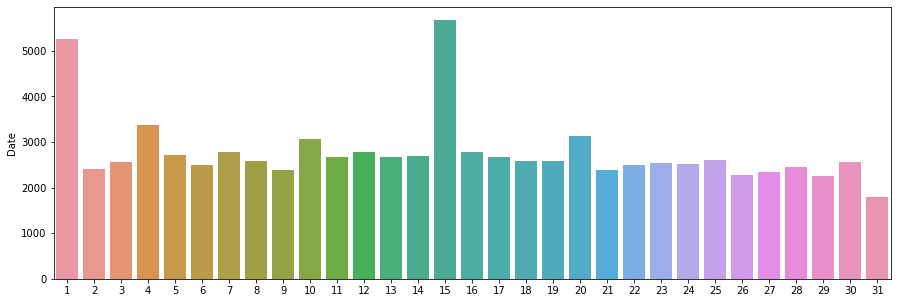

In [37]:
bar = data['Date'].dt.day.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=bar.index, y=bar)
plt.xticks()
plt.show()

# Sightings were more slightly more common during the months of June through November

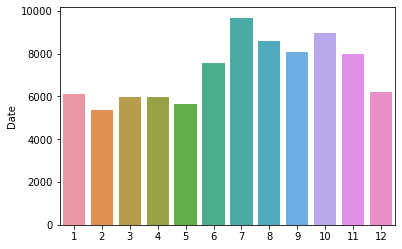

In [38]:
bar = data['Date'].dt.month.value_counts()
sns.barplot(x=bar.index, y=bar)
plt.xticks()
plt.show()

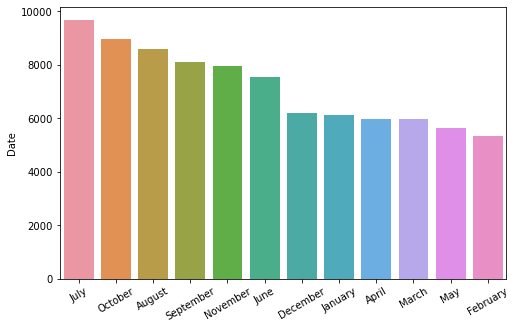

In [39]:
bar = data['Date'].dt.month_name().value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=bar.index, y=bar)
plt.xticks(rotation=30)
plt.show()

In [40]:
data.head()

,Time,Date,City,State,Shape,Duration,Summary
1,0.0,2021-12-19,Deltona,FL,Changing,"1 minute, 9 seconds video",I was on Ring app in house and saw incredible ...
2,21.0,2021-12-18,Long Beach,CA,Triangle,3-5 seconds,3 Boomerang shaped craft flying in formation
3,0.0,2021-12-18,Charlotte,NC,Cigar,still active 12:35am,"flying stick, the ends of it brighter. Recorde..."
4,23.0,2021-12-17,Traver,CA,Oval,2 hours,((HOAX)) near the Foster farms feed mill in Tr...
5,22.0,2021-12-17,Butte,MT,Circle,15 minutes,Saw orb that moved around the moon and got pic...


# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

# Credit for this code is given to the Medium article linked above

In [41]:
text = ' '.join(x for x in data['Summary'])

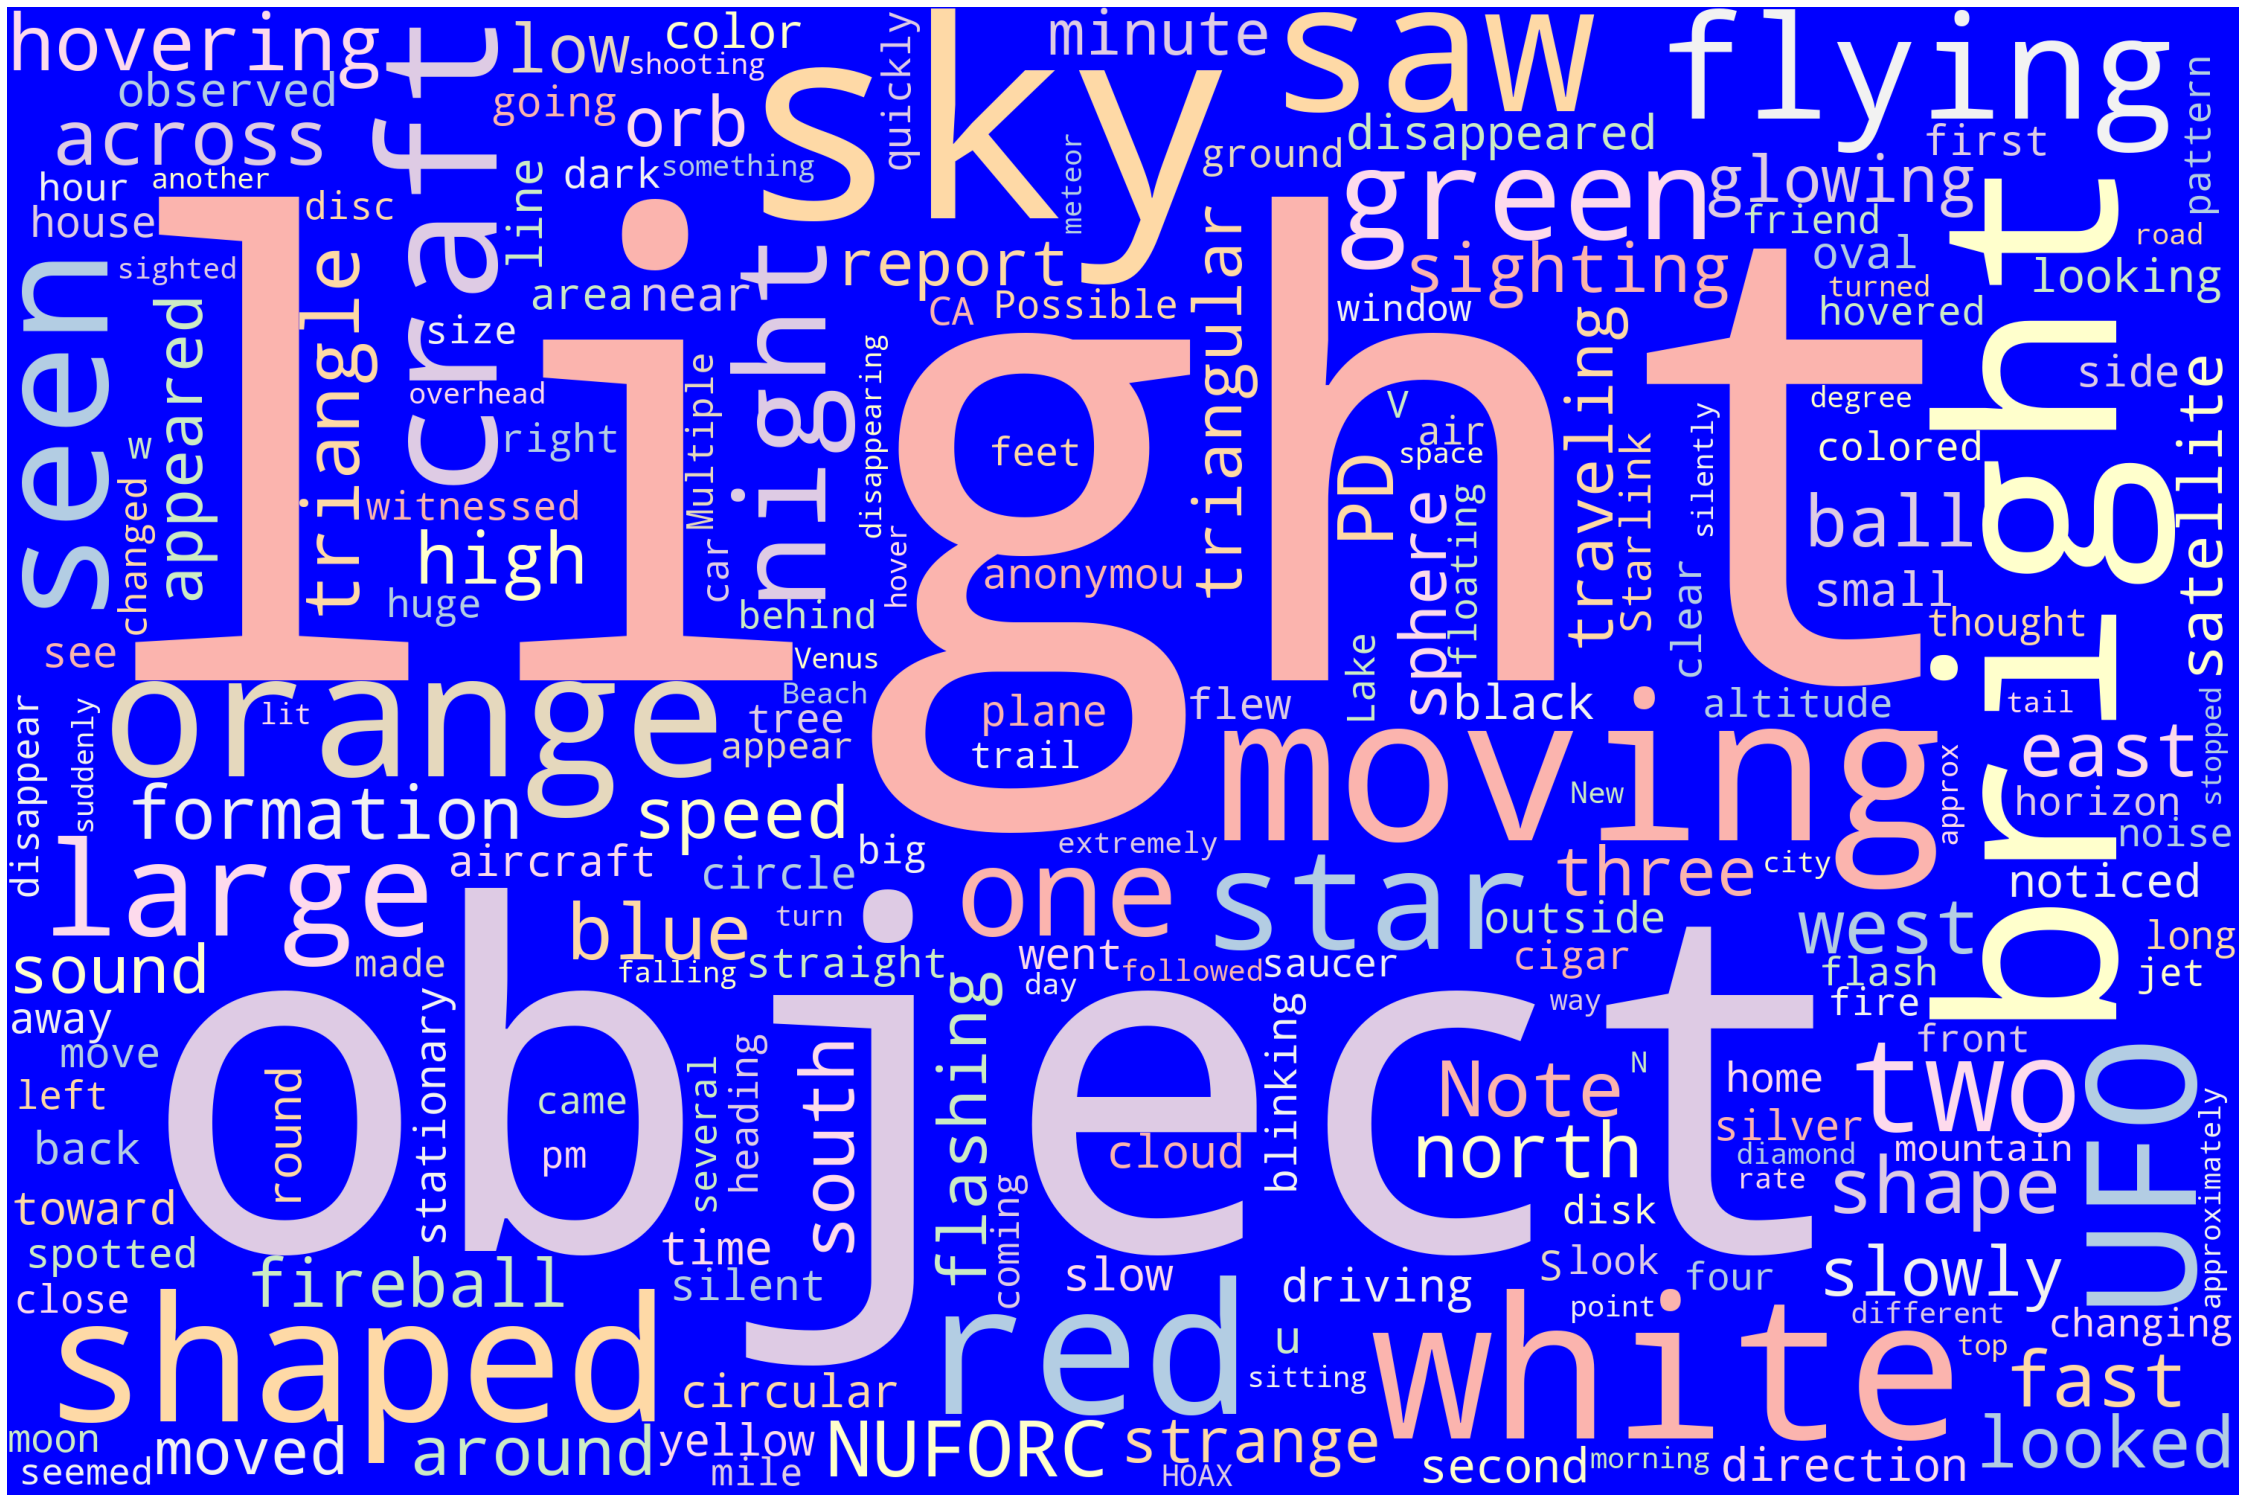

In [42]:

def plot_cloud(wordcloud):

    plt.figure(figsize=(40, 30))

    plt.imshow(wordcloud) 

    plt.axis("off");


# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='blue', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)

In [43]:
data.to_csv('CleanedUFO')

In [44]:
text = ' '.join(x for x in data['Duration'])

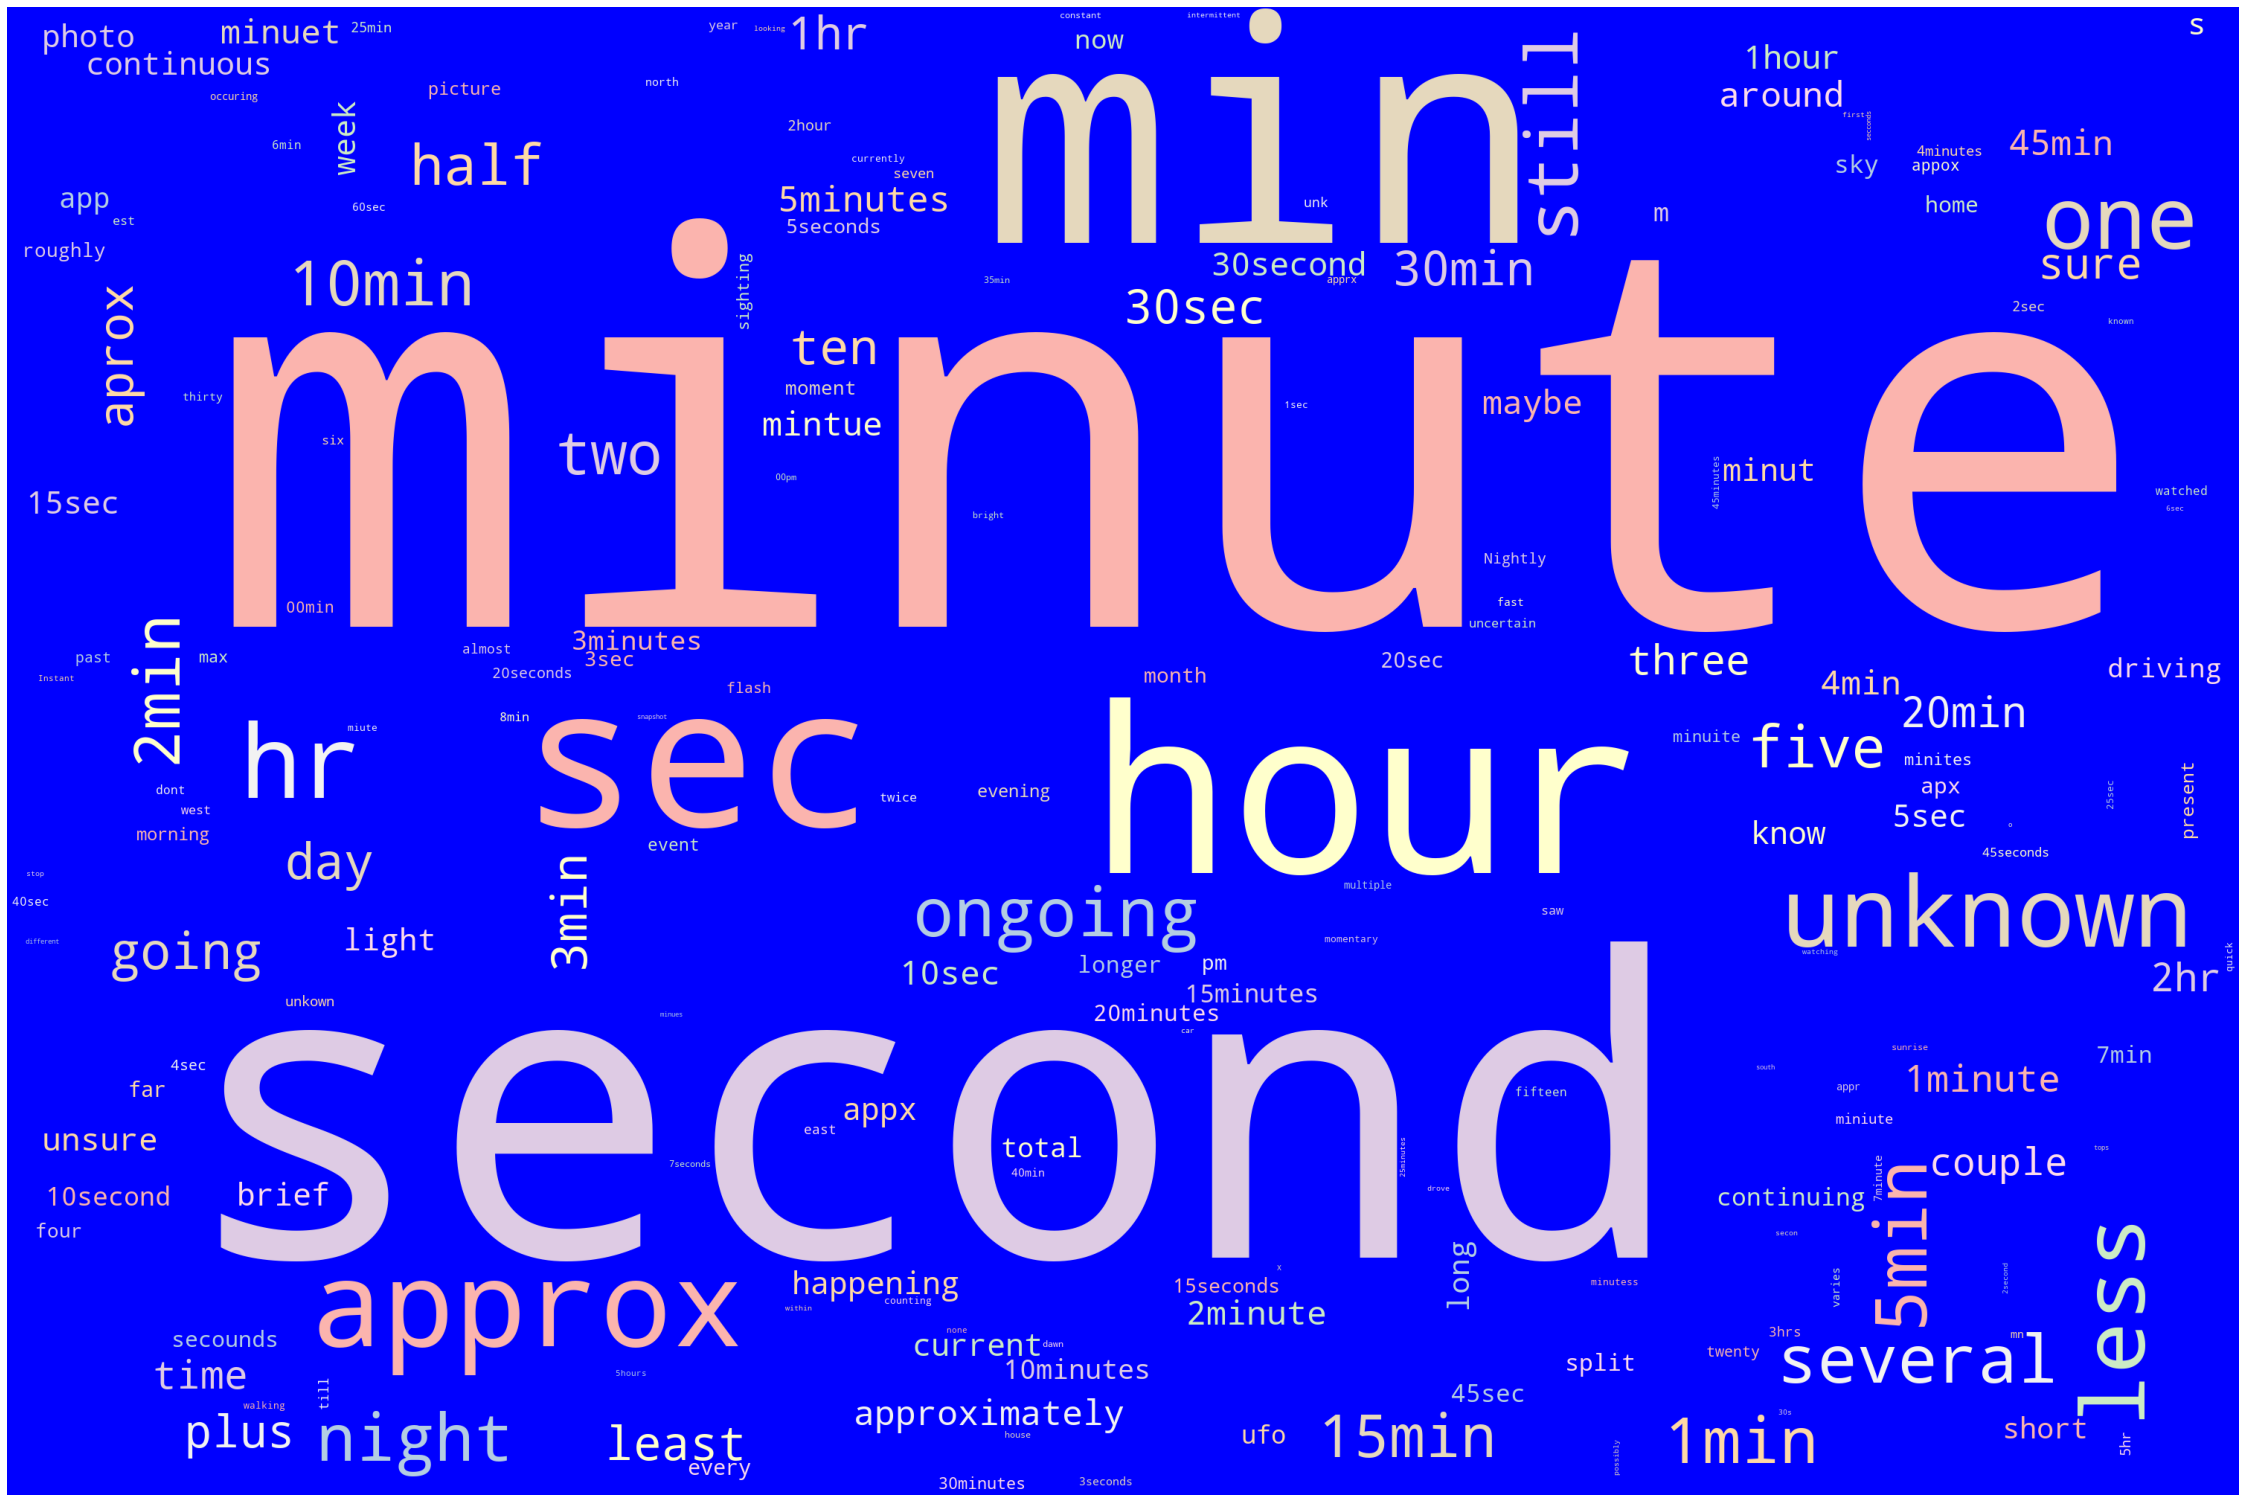

In [45]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='blue', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)